In [7]:
# Já que nunca foi utilizado, o primeiro passo é instalar o pacote que permite usarmos o paccote Ggplot2 no Python
%pip install plotnine

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [8]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install gapminder
# usaremos somente os dados desse pacote

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd # para ler tabelas da pasta dados
from plotnine import * # importa tudo do plotnine
# Apesar das duas base de dados abiaxo vinherem no import acima, faremos isso para chama-los pelos respectivos nomes 'mpg'
# e 'mtcars'
from plotnine.data import mpg
from plotnine.data import mtcars
from gapminder import gapminder
# O comando abaixo é conhecido como magic command, pois ajuda a plotar gráficos no jupyter notebook logo abaixo da célula
# https://towardsdatascience.com/top-8-magic-commands-in-jupyter-notebook-c1582e813560
%matplotlib inline

A [documentacão](https://plotnine.readthedocs.io/en/stable/index.html) da biblioteca Plotnine é bastante interessante de se ler!

In [5]:
# Criação de um dataframe a partir de um dicionário e salvo no objeo 'dados'
dados = pd.DataFrame({"var_x": list(range(4)),
                      "var_y": list(range(2,9,2)),
                      "var_grupo": ["a", "a","a", "b"]})
dados

,var_x,var_y,var_grupo
0,0,2,a
1,1,4,a
2,2,6,a
3,3,8,b


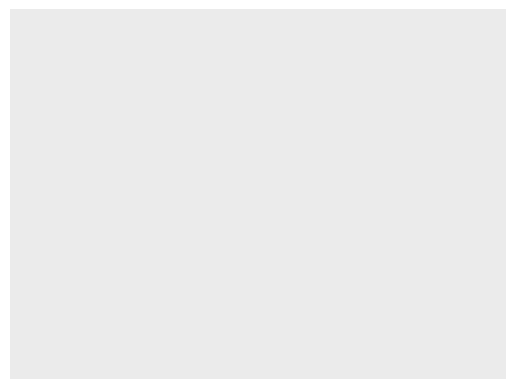

<ggplot: (136794093815)>

In [8]:
# O Plotnine é nada mais do que um API que permite utilizar o ggplot2, criado originalmente para R, em Python. Por isso, todos
# os comandos são do ggplot
# Por exemplo, a principal função do pacote é:
ggplot(dados)
# Não apareceu nada porque adicionamos somente a primeira camada do gráfico: data

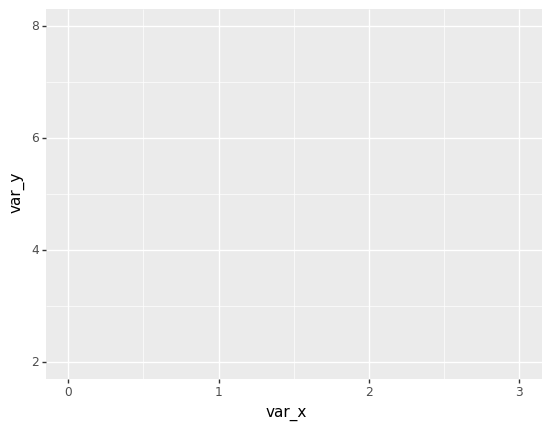

<ggplot: (136795720801)>

In [9]:
# Agora neste exemplo, adicionamos a segunda camada, aesthetics, onde mapeamos os valores que vão ficar no eixo x e y
ggplot(dados, aes(x = "var_x", y = "var_y"))
# Contudo, ainda não aparece nada porque não indicamos o tipo de gráfico que queremos

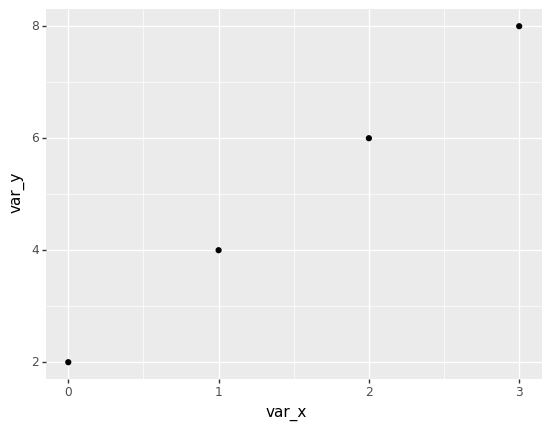

<ggplot: (136795850138)>

In [11]:
# Por fim, no exemplo especifico o tipo de gráfico com o comando geom_point()
(ggplot(dados, aes(x = "var_x", y = "var_y")) +
  geom_point()) # no ggplot, para o empilhamento (concatenação) de funções, usamos o '+' para cada nova camada a ser adicionada

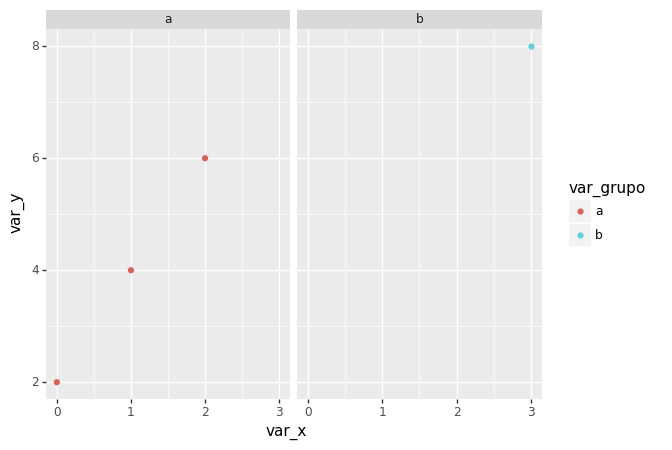

<ggplot: (136795773850)>

In [13]:
# A camada aesthetics pode estar dentro da função principal ggplot ou dentro da função que especifica o tipo de gráfico
# Com os dois funciona, porém é mais interessante coloca-la sempre dentro do respectivo gráfico, visto que podemos sobrepor
# gráficos
(ggplot(dados) +
  geom_point(aes(x = "var_x", y = "var_y",color = "var_grupo"))+
  facet_grid("~var_grupo"))
# Camada de facet adicionada para o var_grupo, onde o mesmo gráfico XY é plotado para os dois. Nota: o til deve estar na frente
# Na função aes, nota-se que o mapeamento do var_grupo é feito por cor

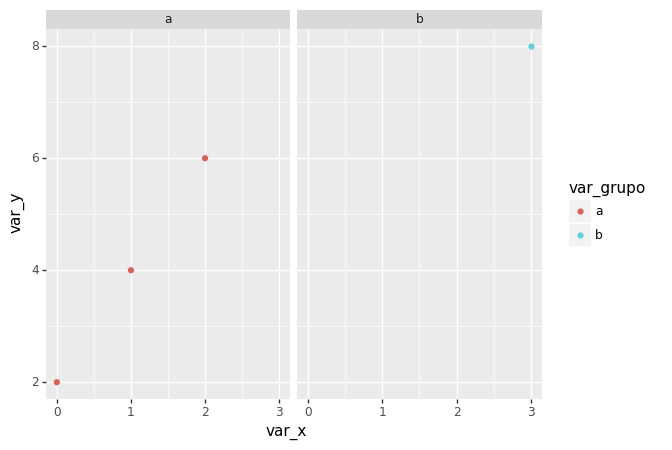

<ggplot: (136795865468)>

In [15]:
# Só para notar que passando o argumento aes dentro da função principal também funciona
(ggplot(dados, aes(x = "var_x", y = "var_y",color = "var_grupo")) +
  geom_point()+
  facet_grid("~var_grupo"))

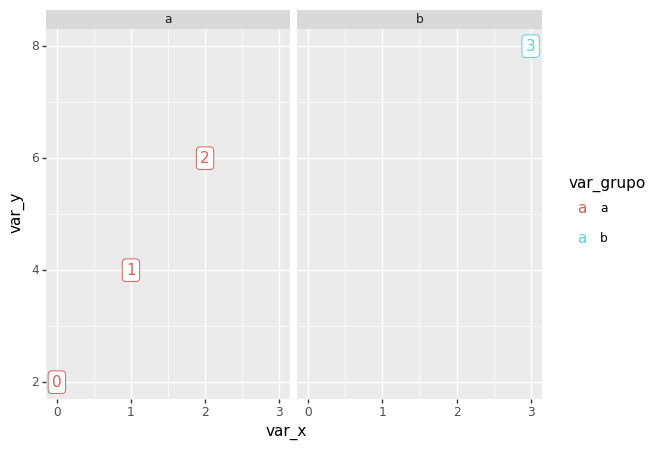

<ggplot: (136796176930)>

In [18]:
# Neste caso, acrescentamos no aes uma label para mostrar os valores de x, trocando o tipo de gráfico para geom_label 
(ggplot(dados, aes(x = "var_x", y = "var_y",color = "var_grupo", label = "var_x")) +
  geom_label()+
  facet_grid("~var_grupo"))

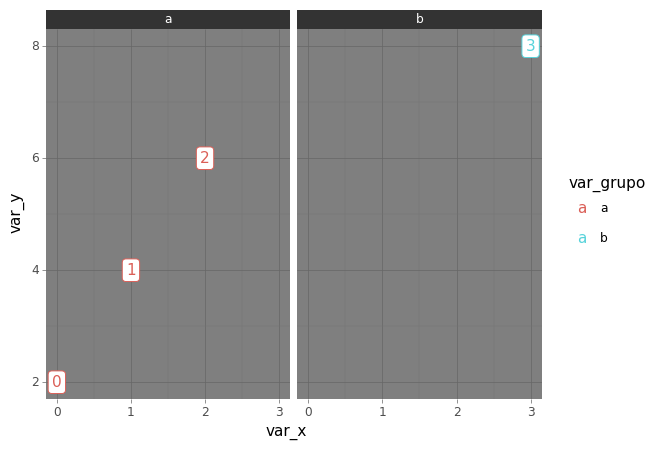

<ggplot: (136796466173)>

In [19]:
# Adicionando a camada de tema
(ggplot(dados, aes(x = "var_x", y = "var_y",color = "var_grupo", label = "var_x")) +
  geom_label()+
  facet_grid("~var_grupo")+
  theme_dark()
 )

## Base de dados Cars93

In [22]:
cars93 = pd.read_csv("../dados/Cars93.csv")
cars93.describe()
cars93.head(10)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


## Histograma

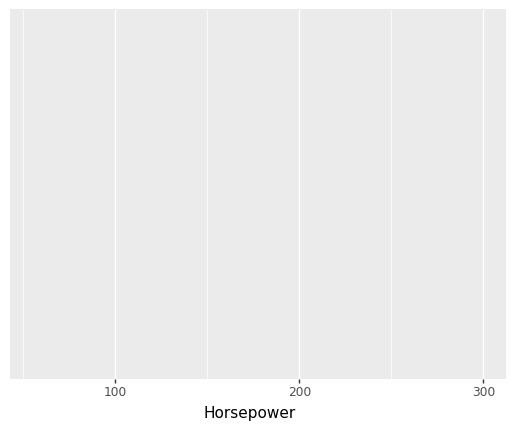

<ggplot: (8778479467959)>

In [40]:
## Histograma: para ver a distribuição de uma variável numérica
ggplot(cars93, aes(x = "Horsepower")) # precisamos especificar o tipo de gráfico

C:\ProgramData\miniconda3\envs\datascience\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 9'. Pick better value with 'binwidth'.


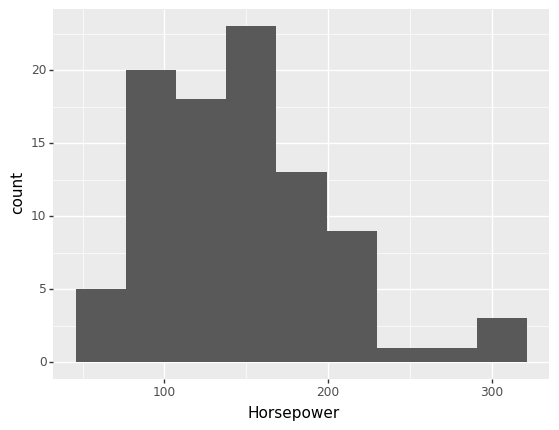

<ggplot: (136796318531)>

In [23]:
## No histograma, precisamos somente do eixo x, visto que o eixo y é a frequência de ocorrências
(ggplot(cars93, aes(x = "Horsepower")) +
 geom_histogram())

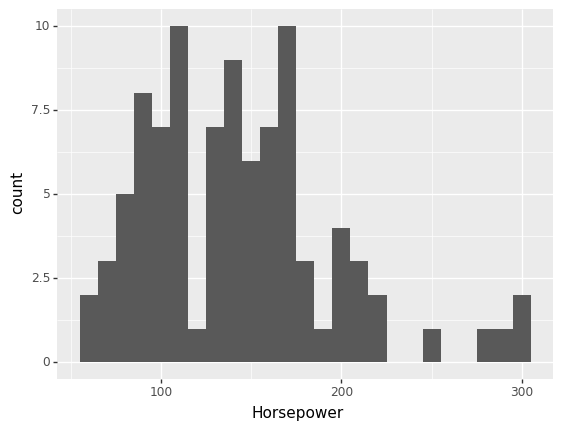

<ggplot: (136796462547)>

In [24]:
## O histograma possui um parâmetro para definir a espessura da coluna chamado binwidth
(ggplot(cars93, aes(x = "Horsepower")) +
 geom_histogram(binwidth =10))

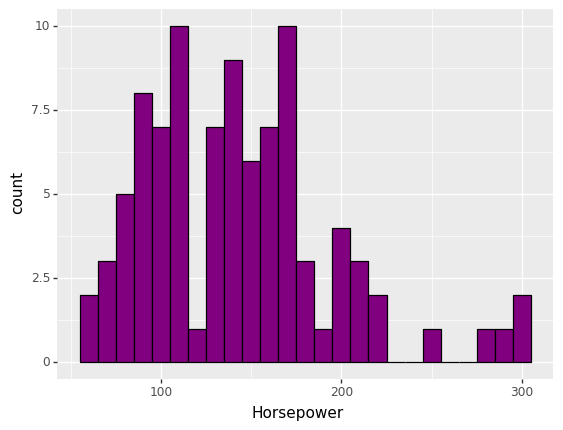

<ggplot: (136796918339)>

In [28]:
## Agora inserimos como argumento do histograma cor da borda e preenchimento
(ggplot(cars93, aes(x = "Horsepower")) +
 geom_histogram(binwidth =10, color = "black", fill = "purple")
 )

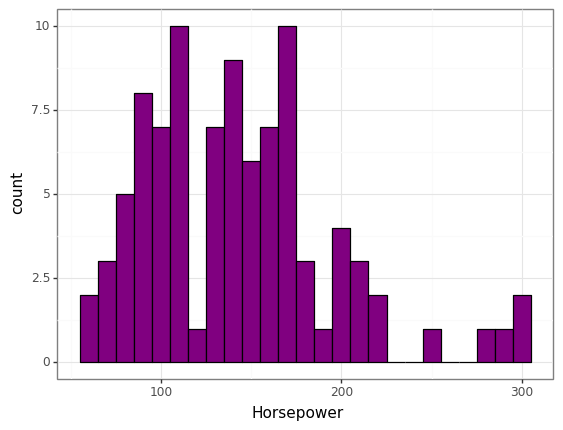

<ggplot: (136797148555)>

In [29]:
## Inserindo a camada tema
(ggplot(cars93, aes(x = "Horsepower")) +
 geom_histogram(binwidth =10, color = "black", fill = "purple") +
 theme_bw()
 )

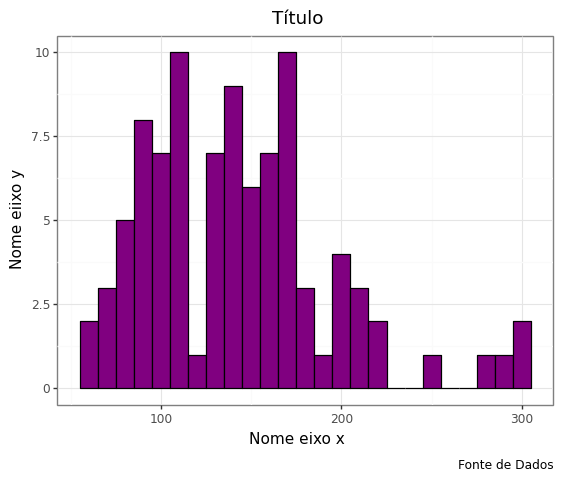

<ggplot: (136796037895)>

In [30]:
## Inserindo a camada de labels
(ggplot(cars93, aes(x = "Horsepower")) +
 geom_histogram(binwidth =10, color = "black", fill = "purple") +
 theme_bw() +
 labs(x = "Nome eixo x",
      y = "Nome eiixo y",
      title = "Título",
      caption="Fonte de Dados")
 )

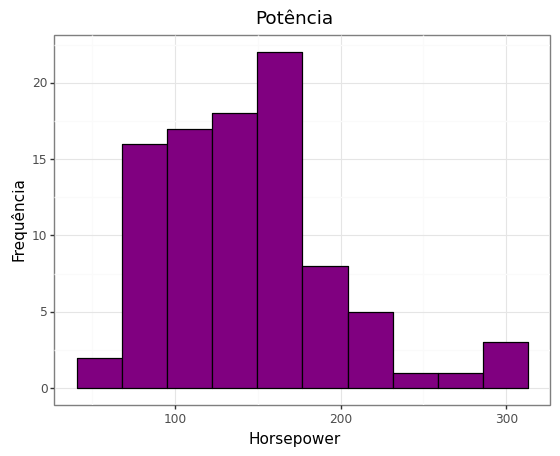

<ggplot: (136798719639)>

In [37]:
## No lugar de definir o tamanho das barras, podemos dizer com quantas barras queremos representar a variável através do
# argumento bins
(ggplot(cars93, aes(x = "Horsepower")) +
 geom_histogram(bins =10, color = "black", fill = "purple") +
 theme_bw() +
 labs(x = "Horsepower",
      y = "Frequência",
      title = "Potência")
 )

## Gráfico de barras

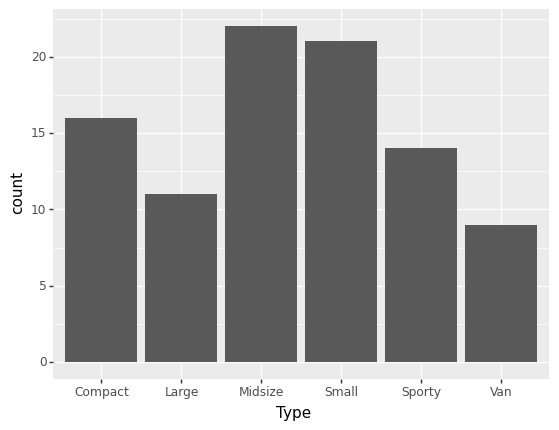

<ggplot: (136798785332)>

In [39]:
## Gráfico de Barras: muito usado para quantificar categorias (variáveis categóricas)
# variável Type a ser representada mapeada pelo aes
(ggplot(cars93, aes(x = "Type")) +
 geom_bar()
 )

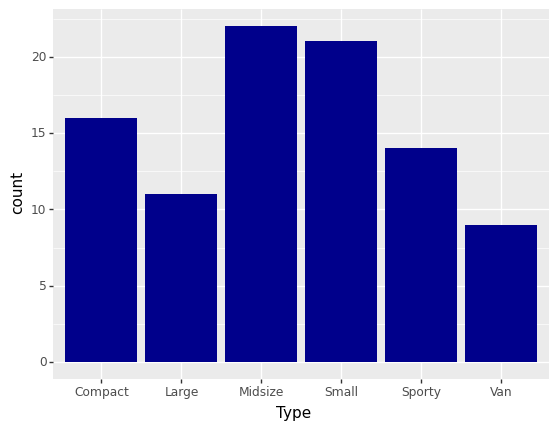

<ggplot: (136796307182)>

In [44]:
## Customizando inserindo cor de preenchimento das barras
(ggplot(cars93, aes(x = "Type")) +
 geom_bar(fill = "darkblue")
 )

# Nota: o Python aceita cores em hexadecimal (pesquisar: hex colors)

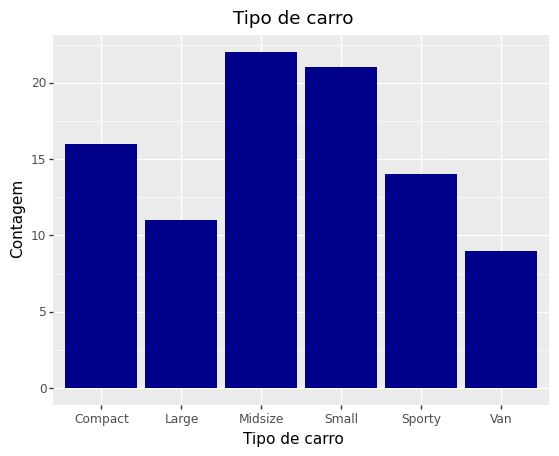

<ggplot: (136798751139)>

In [41]:
## Inserindo labels
(ggplot(cars93, aes(x = "Type")) +
 geom_bar(fill = "darkblue") +
 labs(x = "Tipo de carro",
      y = "Contagem",
      title = "Tipo de carro")
 )

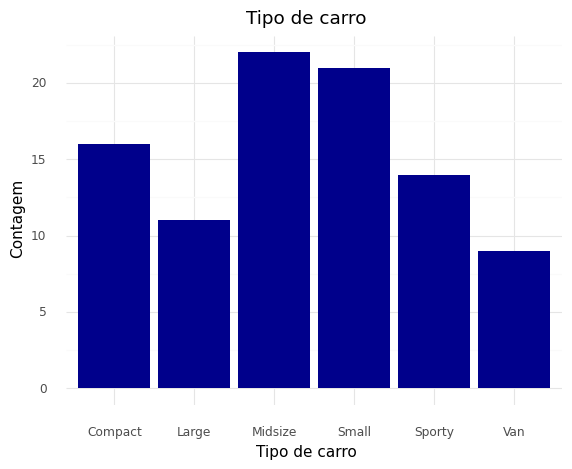

<ggplot: (136796037030)>

In [45]:
## Inserindo tema
(ggplot(cars93, aes(x = "Type")) +
 geom_bar(fill = "darkblue") +
 labs(x = "Tipo de carro",
      y = "Contagem",
      title = "Tipo de carro") +
 theme_minimal()
 )

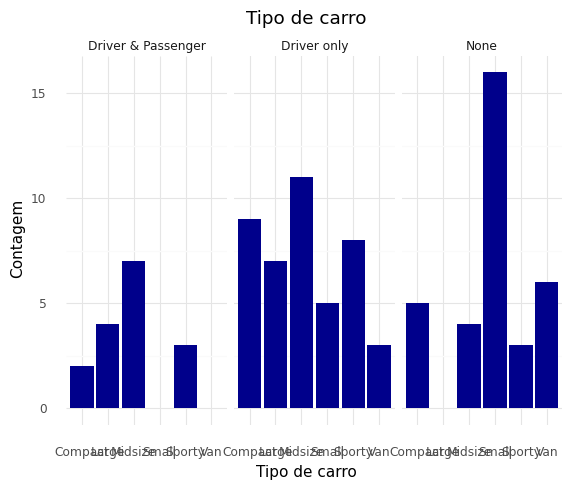

<ggplot: (136795716139)>

In [47]:
## Inserindo camada facet para gerar os gráficos de acordo com as categorias da coluna airbags
(ggplot(cars93, aes(x = "Type")) +
 geom_bar(fill = "darkblue") +
 labs(x = "Tipo de carro",
      y = "Contagem",
      title = "Tipo de carro") +
 theme_minimal() +
 facet_grid("~AirBags")
 )

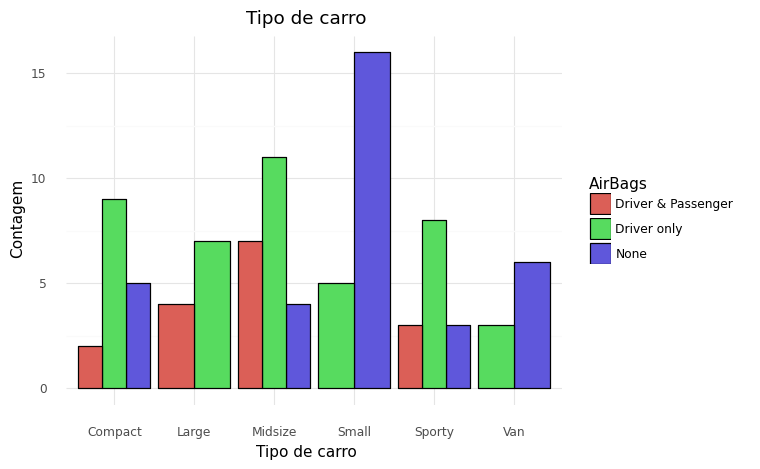

<ggplot: (136796444335)>

In [54]:
## Ao invés de facearmos o gráfico, também podemos aplicar uma cor (fill) de acordo com a categoria airbags. Note que a cor
# é aleatória
(ggplot(cars93, aes(x = "Type", fill = "AirBags")) + # cor das colunas tipo de airbag
 geom_bar(position = "dodge", # coloca colunas lado a lado. Sem essa informação, todas as cores ficam em uma mesma barra
          color = "black") +
 labs(x = "Tipo de carro",
      y = "Contagem",
      title = "Tipo de carro") +
 theme_minimal()
 )

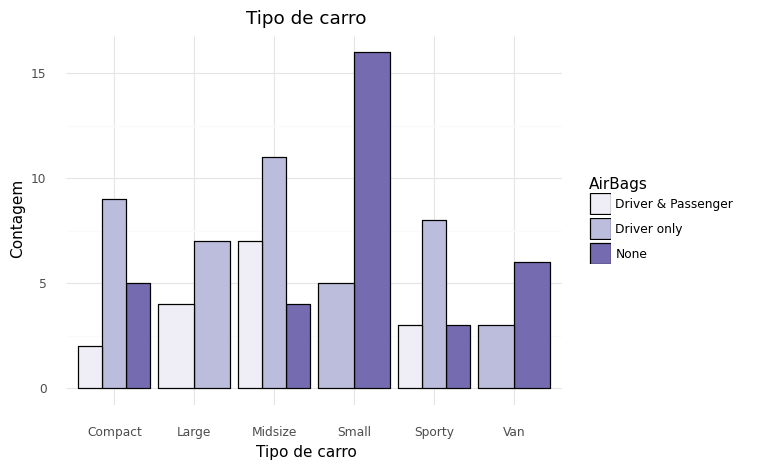

<ggplot: (136796466938)>

In [57]:
## Inserindo escala de cores. Neste caso, especificamos uma escala de cores. No caso, tons de roxo conforme método 
# scale_fill_brewer
(ggplot(cars93, aes(x = "Type", fill = "AirBags")) +
 geom_bar(position = "dodge",
          color = "black") +
 labs(x = "Tipo de carro",
      y = "Contagem",
      title = "Tipo de carro") +
 theme_minimal() +
 scale_fill_brewer(palette = "Purples",
                   direction = 1)
 )
# Contudo, é mais recomendado usar escala de cores com variáveis contínuas

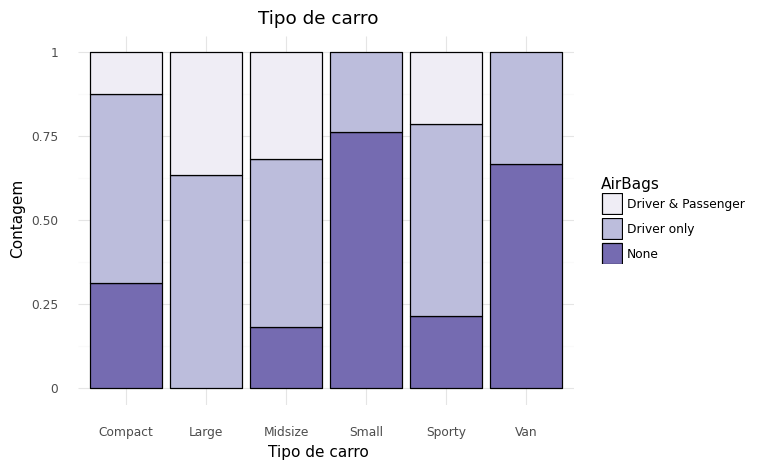

<ggplot: (136798643435)>

In [59]:
## Trocando as barras lado a lado para empilhadas usando o position = "fill"
(ggplot(cars93, aes(x = "Type", fill = "AirBags")) +
 geom_bar(position = "fill", # empilhado em 100%
          color = "black") +
 labs(x = "Tipo de carro",
      y = "Contagem",
      title = "Tipo de carro") +
 theme_minimal() +
 scale_fill_brewer(palette = "Purples",
                   direction = 1)
 )
# Esse gráfico é muito bom para ver as proporções dentro de cada categoria

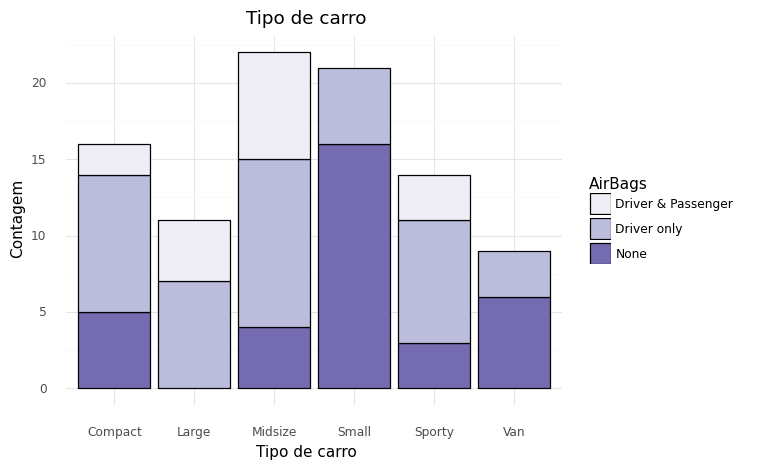

<ggplot: (136796930160)>

In [64]:
## Trocando para barras com base na frequência absoluta de ocorrências usando o position = "stack"
(ggplot(cars93, aes(x = "Type", fill = "AirBags")) +
 geom_bar(position = "stack", # empilhadado com base na freq. absoluta
          color = "black") +
 labs(x = "Tipo de carro",
      y = "Contagem",
      title = "Tipo de carro") +
 theme_minimal() +
 scale_fill_brewer(palette = "Purples",
                   direction = 1)
 )

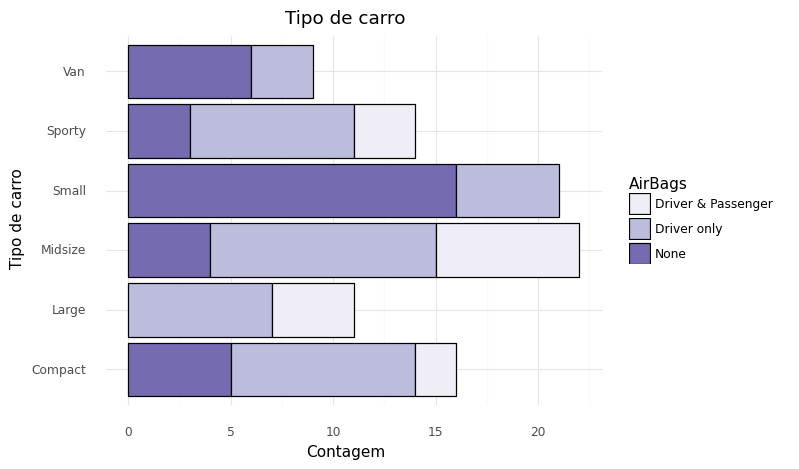

<ggplot: (136795809401)>

In [65]:
## Inserindo a camada de coordenadas para inverte-las com coord_flip()
(ggplot(cars93, aes(x = "Type", fill = "AirBags")) +
 geom_bar(position = "stack", # empilhadado com base na freq. absoluta
          color = "black") +
 labs(x = "Tipo de carro",
      y = "Contagem",
      title = "Tipo de carro") +
 theme_minimal() +
 scale_fill_brewer(palette = "Purples",
                   direction = 1) +
 coord_flip() # inverte eixos
 )

## Base de dados HairEyeColor

In [69]:
hair = pd.read_csv("../dados/HairEyeColor.csv")
hair.describe()
hair.head(10)

,Unnamed: 0,Hair,Eye,Sex,Freq
0,1,Black,Brown,Male,32
1,2,Brown,Brown,Male,53
2,3,Red,Brown,Male,10
3,4,Blond,Brown,Male,3
4,5,Black,Blue,Male,11
5,6,Brown,Blue,Male,50
6,7,Red,Blue,Male,10
7,8,Blond,Blue,Male,30
8,9,Black,Hazel,Male,10
9,10,Brown,Hazel,Male,25


In [72]:
# Transformando dado em categoria
# A coluna gênero é criada para receber a coluna sex transformada para categoria
hair['Genero'] = hair['Sex'].astype('category')
hair.head() # aparentemente não faz diferença, mas para o Python sim

,Unnamed: 0,Hair,Eye,Sex,Freq,Genero
0,1,Black,Brown,Male,32,Male
1,2,Brown,Brown,Male,53,Male
2,3,Red,Brown,Male,10,Male
3,4,Blond,Brown,Male,3,Male
4,5,Black,Blue,Male,11,Male


## Box-plot

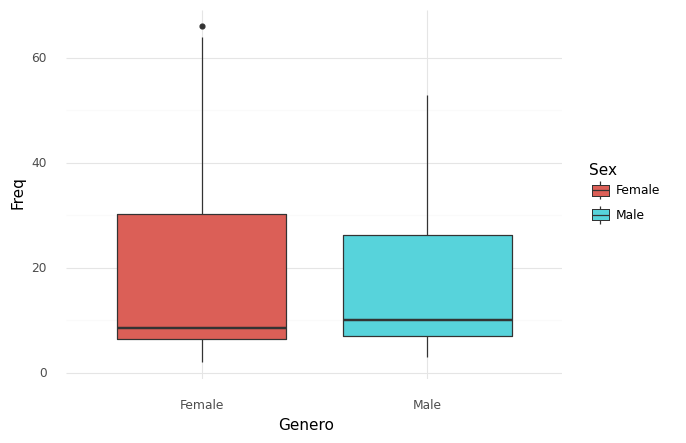

<ggplot: (136796918441)>

In [73]:
# Mapeando genero e frequência em x e y, respectivamente. Enquanto o sexo é mapeado pela cor
(ggplot(hair, aes(x = "Genero",
                  y = "Freq",
                  fill = "Sex")) +
 theme_minimal() +
 geom_boxplot()
)

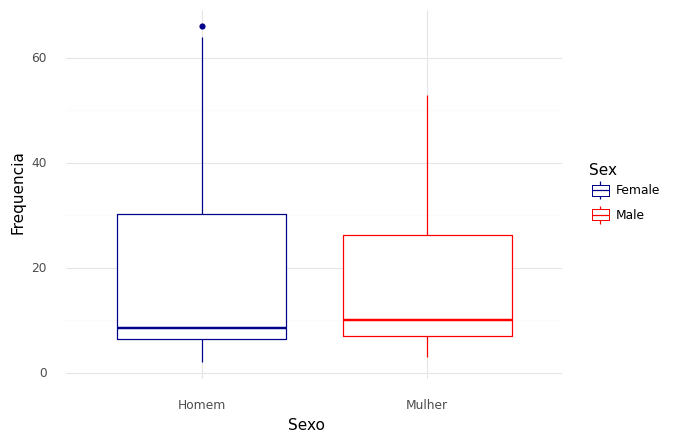

<ggplot: (136796305616)>

In [74]:
# Alterando a cor e configurando de acordo com a categoria gênero
(ggplot(hair, aes(x = "Genero",
                  y = "Freq",
                  color = "Sex")) + # cor da caixa
 theme_minimal() +
 geom_boxplot() +
 scale_x_discrete(labels = ["Homem", "Mulher"]) + # altera a descrição da escala para homem e mulher através de uma lista
 xlab("Sexo") +
 ylab("Frequencia") +
 scale_color_manual(values = ["darkblue", "red"]) # alteramos a escala de cores também através de uma lista
)

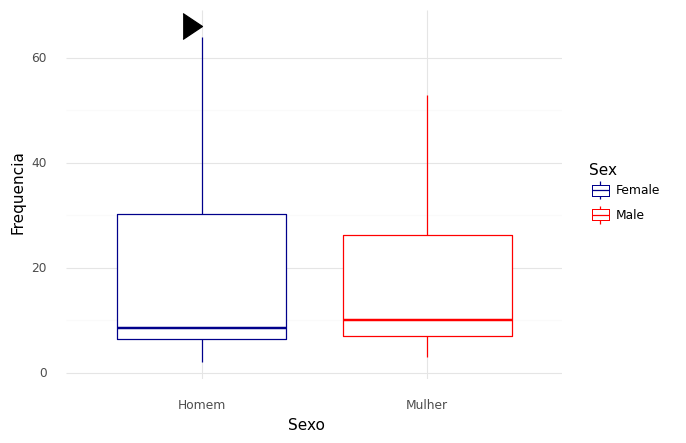

<ggplot: (136797237173)>

In [80]:
# No gráfico boxplot conseguimos ver a dispersão dos dados e a presença de outliers. Podemos configurar esse outlier com o
# argumento dentro da função geom_boxplot, conforme abaixo
(ggplot(hair, aes(x = "Genero",
                  y = "Freq",
                  color = "Sex")) + # cor da caixa
 theme_minimal() +
 geom_boxplot(outlier_colour = "black",
              outlier_shape = 5, # pesquisar lista de shapes na internet
              outlier_size = 10) +
 scale_x_discrete(labels = ["Homem", "Mulher"]) +
 xlab("Sexo") +
 ylab("Frequencia") +
 scale_color_manual(values = ["darkblue", "red"])
)

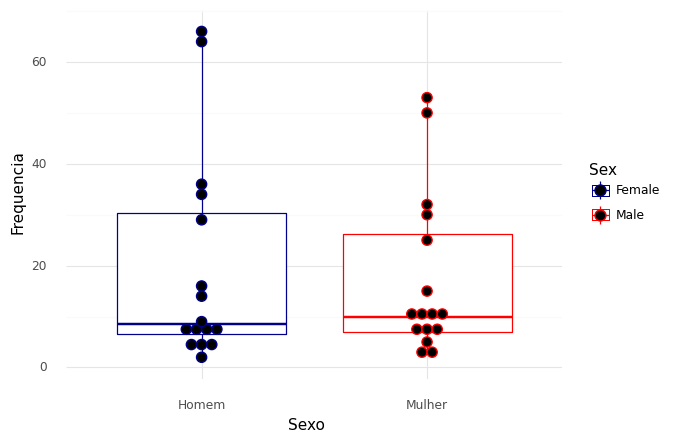

<ggplot: (136796368698)>

In [82]:
# Inserindo uma sobreposição de gráficos: boxplot e dispersão de dados
(ggplot(hair, aes(x = "Genero",
                  y = "Freq",
                  color = "Sex")) + # cor da caixa
 theme_minimal() +
 geom_boxplot() +
 geom_dotplot(binaxis = 'y',
              stackdir = 'center',
              dotsize = 1,
              binwidth = 2) +
 scale_x_discrete(labels = ["Homem", "Mulher"]) +
 xlab("Sexo") +
 ylab("Frequencia") +
 scale_color_manual(values = ["darkblue", "red"])
)

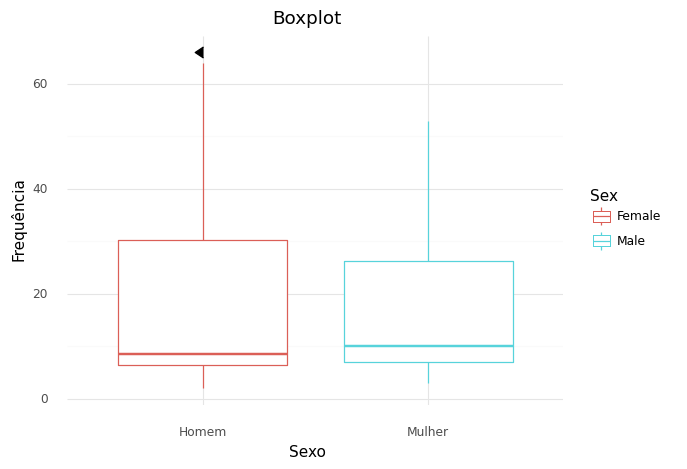

<ggplot: (136795990233)>

In [84]:
# Tirando a escala de cores, vem as cores padrão do pacote
(ggplot(hair, aes(x = "Genero",
                  y = "Freq",
                  color = "Sex")) + # cor da caixa
 theme_minimal() +
 geom_boxplot(outlier_colour = "black", # no R é outlier.colour
              outlier_shape = 8,
              outlier_size = 4) +
 scale_x_discrete(labels = ["Homem", "Mulher"]) + #cores padrao do ggplot2
 labs(title = "Boxplot",
      x = "Sexo",
      y = "Frequência")
)

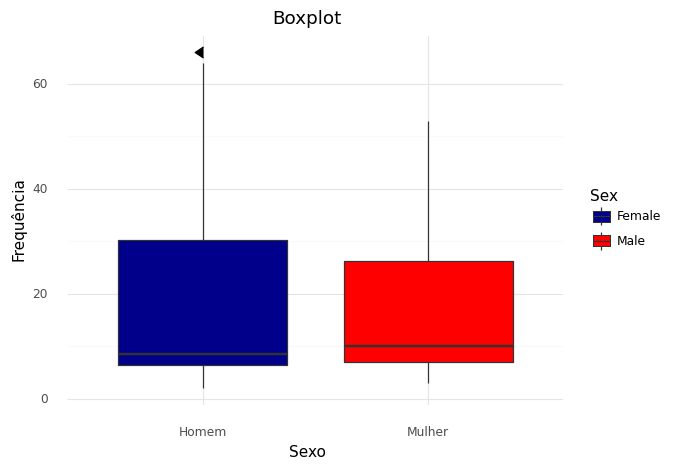

<ggplot: (136796325536)>

In [88]:
# Para preencher a caixa do boxplot, no lugar de color, utiliza-se fill dentro da função principal
(ggplot(hair, aes(x = "Genero",
                  y = "Freq",
                  fill = "Sex")) + # cor da caixa
 theme_minimal() +
 geom_boxplot(outlier_colour = "black", # no R é outlier.colour
              outlier_shape = 8,
              outlier_size = 4) +
 scale_x_discrete(labels = ["Homem", "Mulher"]) + #cores padrao do ggplot2
 labs(title = "Boxplot",
      x = "Sexo",
      y = "Frequência") +
 scale_fill_manual(values = ["darkblue", "red"])
)

In [89]:
# lembra que importamos o dataset do pacote plotnine no começo da aula?
mtcars.describe()
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


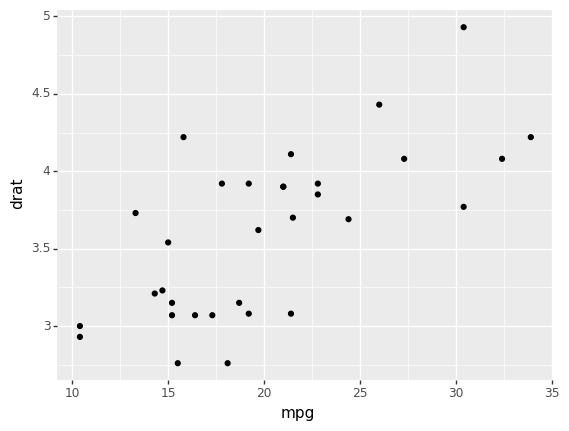

<ggplot: (136796307095)>

In [90]:
# Criando um gráfico de dispersão (geom_point)
(ggplot(mtcars, aes(x="mpg", y="drat")) +
 geom_point()
)

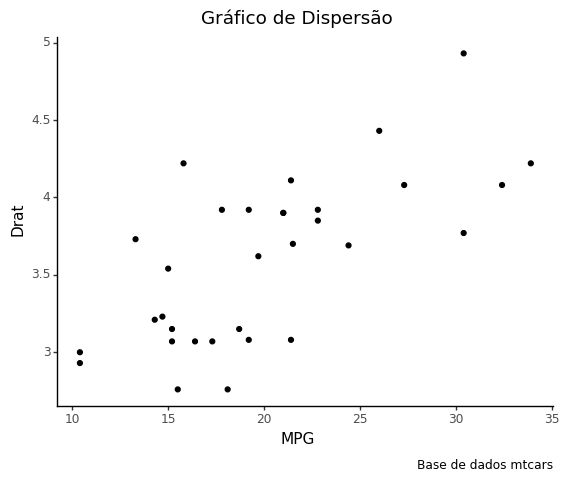

<ggplot: (136797146341)>

In [92]:
# Iniciando a customização com tema e labels
(ggplot(mtcars, aes(x="mpg", y="drat")) +
 geom_point() +
 theme_classic() +
 labs(title = "Gráfico de Dispersão",
      x = "MPG",
      y = "Drat",
      caption = "Base de dados mtcars")
)

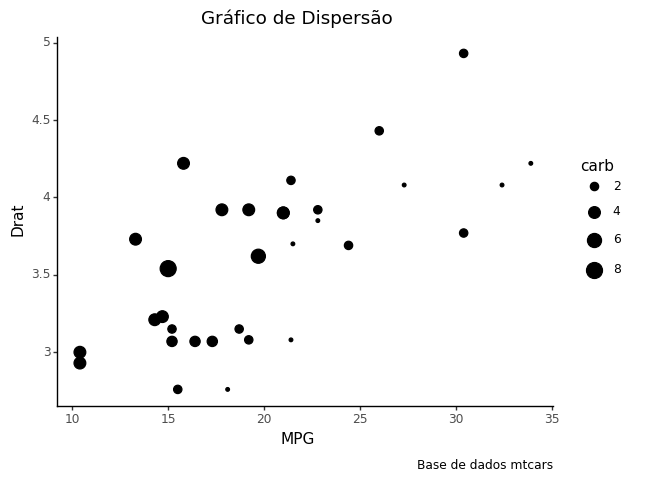

<ggplot: (136795828471)>

In [94]:
# Usando o tamanho das bolinhas para representar outra variável com size="carb" dentro da função principal
(ggplot(mtcars, aes(x="mpg", y="drat", size="carb")) +
 geom_point() +
 theme_classic() +
 labs(title = "Gráfico de Dispersão",
      x = "MPG",
      y = "Drat",
      caption = "Base de dados mtcars")
)

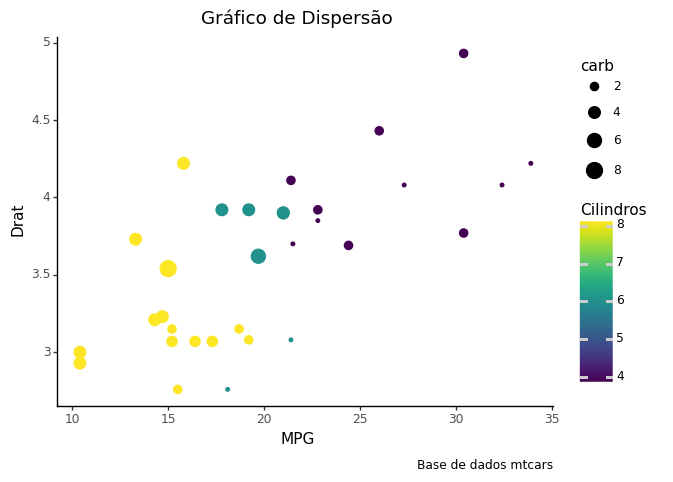

<ggplot: (136798824165)>

In [95]:
# Usando as cores da bolinhas para representar outra variável, no caso colour="cyl"
(ggplot(mtcars, aes(x="mpg",
                    y="drat",
                    size="carb",
                    colour="cyl")) +
 geom_point() +
 theme_classic() +
 labs(title = "Gráfico de Dispersão",
      x = "MPG",
      y = "Drat",
      colour = "Cilindros",
      caption = "Base de dados mtcars")
)

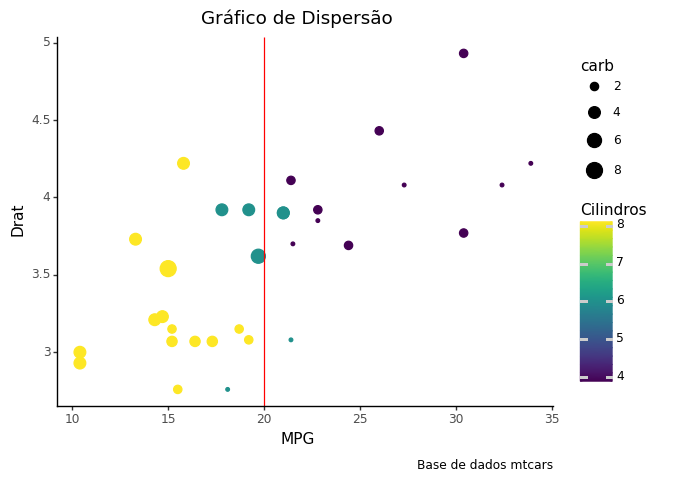

<ggplot: (136796547985)>

In [97]:
# Ao notar que a dispersão dos dados tem um padrão bem definido e queremos destacar isso. Assim, dividimos o gráfico usando
# a camada geom_vline
(ggplot(mtcars, aes(x="mpg",
                    y="drat",
                    size="carb",
                    colour="cyl")) +
 geom_point() +
 theme_classic() +
 labs(title = "Gráfico de Dispersão",
      x = "MPG",
      y = "Drat",
      colour = "Cilindros",
      caption = "Base de dados mtcars") +
 geom_vline(xintercept=20, color="red") # no R é col="red"
)

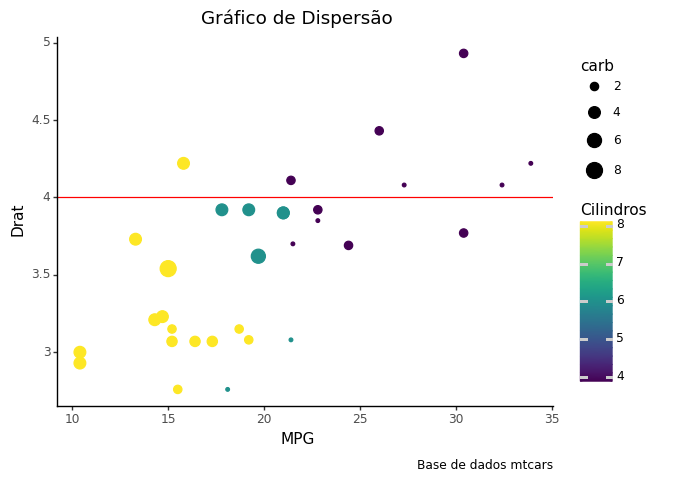

<ggplot: (136796156657)>

In [98]:
# A mesma coisa do passo anterior, mas para uma linha na horizontal
(ggplot(mtcars, aes(x="mpg",
                    y="drat",
                    size="carb",
                    colour="cyl")) +
 geom_point() +
 theme_classic() +
 labs(title = "Gráfico de Dispersão",
      x = "MPG",
      y = "Drat",
      colour = "Cilindros",
      caption = "Base de dados mtcars") +
 geom_hline(yintercept=4, color="red") # no R é col="red"
)

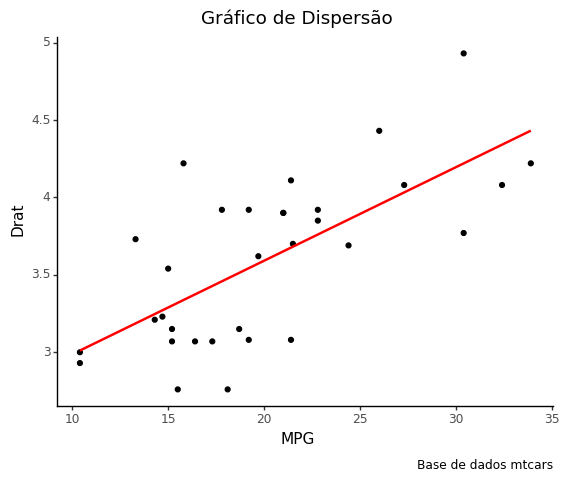

<ggplot: (136798818386)>

In [99]:
# Para realizar uma regressão linear, ajustando uma reta em meio a distribuição de pontos, adicionamos uma camada de gráfico
# chamada geon_smoth
(ggplot(mtcars, aes(x="mpg",
                    y="drat")) +
 geom_point() +
 theme_classic() +
 labs(title = "Gráfico de Dispersão",
      x = "MPG",
      y = "Drat",
      colour = "Cilindros",
      caption = "Base de dados mtcars") +
 geom_smooth(method = "lm", se = False, color = "red") # método linear, intervalo de confiança false e cor
)

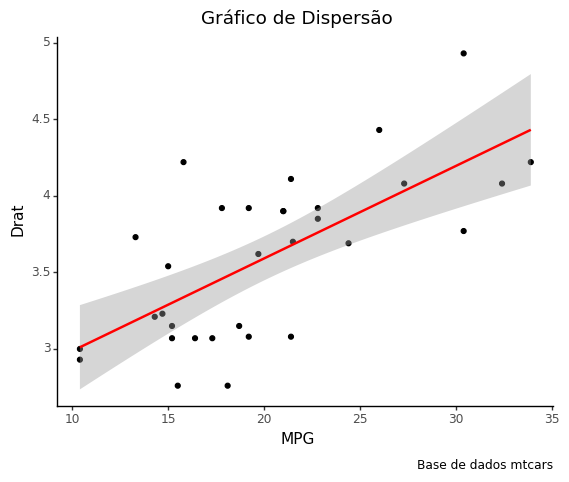

<ggplot: (136798545833)>

In [103]:
# Mesmo caso do passo anterior, mas considerando um intervalo de confiança TRUE
(ggplot(mtcars, aes(x="mpg",
                    y="drat")) +
 geom_point() +
 theme_classic() +
 labs(title = "Gráfico de Dispersão",
      x = "MPG",
      y = "Drat",
      colour = "Cilindros",
      caption = "Base de dados mtcars") +
 geom_smooth(method = "lm", se = True, color = "red")
)

In [104]:
## Base de dados GapMinder

In [105]:
gapminder.describe()
gapminder.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


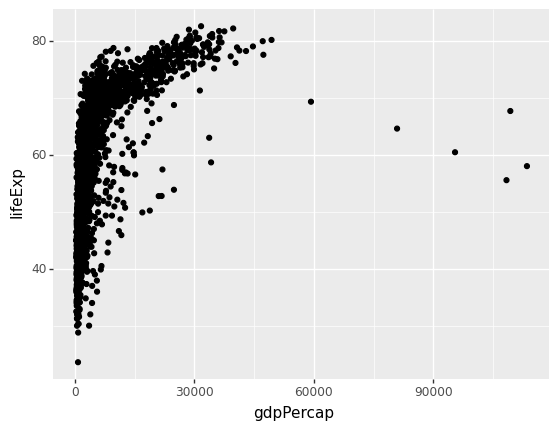

<ggplot: (136795741871)>

In [108]:
# Vendo como o PIB/per capita se compora de acordo com a expectativa de vida
(ggplot(gapminder, aes(x = "gdpPercap", y = "lifeExp")) +
 geom_point()
 )
# note que não passamos o nome dos parâmetros (argumentos posicionais). Por boa prática, é bom indicar.

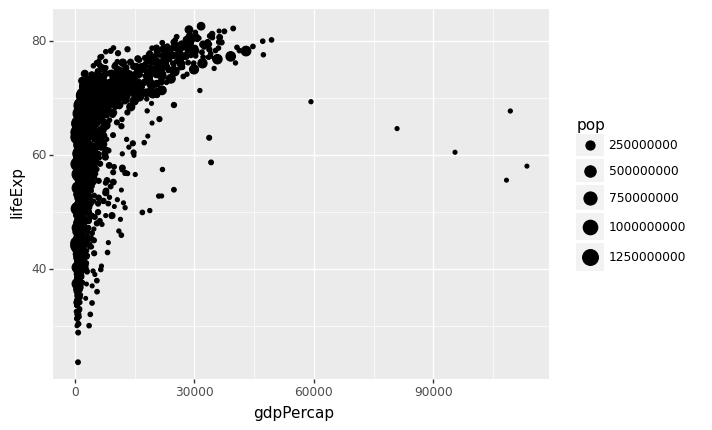

<ggplot: (136796303791)>

In [109]:
# Customizando usando tamanho das bolas para mapear a população
(ggplot(gapminder, aes(x ="gdpPercap",
                       y="lifeExp",
                       size= "pop")) +
 geom_point()
 )

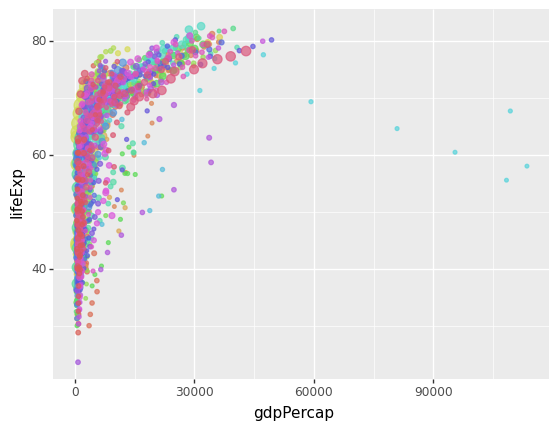

<ggplot: (136797216753)>

In [111]:
# Customizando usando a cor das bolas para mapear a população
# Além disso, inserimos argumentos de geom_point para não mostrar as legendas (show_legend) e inserr transparência (alpha)
(ggplot(gapminder, aes(x ="gdpPercap",
                       y="lifeExp",
                       size= "pop",
                       colour = "country")) +
 geom_point(show_legend = False, alpha = 0.7)
 )

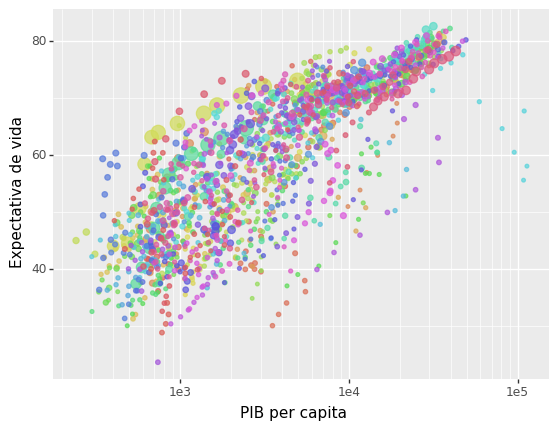

<ggplot: (136798688859)>

In [115]:
# Nota-se nos gráficos anteriores que há um colapso de dados, onde todos estão concentrados próximos do 0. Isto ocorre devido a
# presença de outliers que, no caso, são os países mais populosos: Índia e China. Para resolver isso, vamos aplicar uma escala
# do tipo log usando o scale_x_log10()
(ggplot(gapminder, aes(x ="gdpPercap",
                       y="lifeExp",
                       size= "pop",
                       colour = "country")) +
 geom_point(show_legend = False, alpha = 0.7) +
 scale_x_log10() +
 labs(x = "PIB per capita", y = "Expectativa de vida")
 )
# Desta forma, nota-se que quanto maior o PIB/per capita, maior a expectativa de vida

In [117]:
# O gráfico anterior mostra dados de vários anos
# Vamos criar uma variável para guardar só os dados de 2007
gapminder_2007 = gapminder[gapminder["year"]== 2007]
gapminder_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


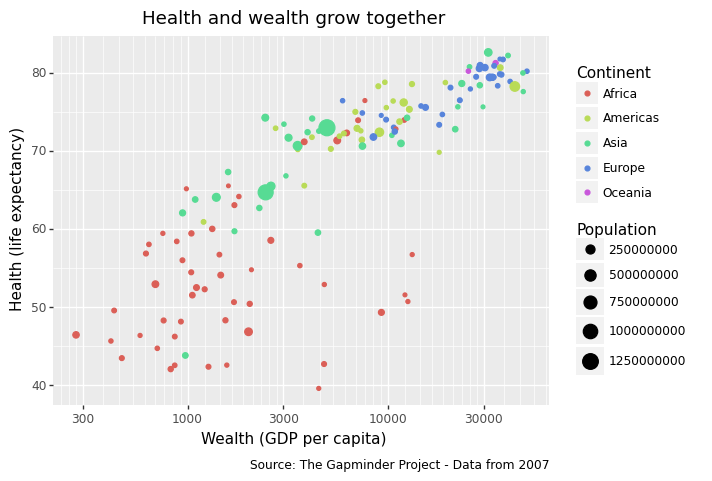

<ggplot: (136797117543)>

In [118]:
# Gerando o mesmo gráfico
(ggplot(gapminder_2007,
       aes(x = "gdpPercap", y = "lifeExp",
           color = "continent", size = "pop")) +
  geom_point() +
  scale_x_log10() +
  labs(title = "Health and wealth grow together",
       x = "Wealth (GDP per capita)",
       y = "Health (life expectancy)",
       color = "Continent",
       size = "Population",
       caption = "Source: The Gapminder Project - Data from 2007"))


## Customizando o seu gráfico

Os elementos visuais do nosso gráficos não relacionados a representacão dos nossos dados podem ser customizados com comando theme(). [Neste artigo](https://cmdlinetips.com/2021/05/tips-to-customize-text-color-font-size-in-ggplot2-with-element_text/) vários elementos textuais são explorados. Neste [outro artigo](https://cmdlinetips.com/2021/06/ggplot2-theme-element_blank-tips/) o chamado element_blank é explorado (usamos ele para não plotar alguns elementos do gráfico). Já o artigo [deste link](https://cmdlinetips.com/2021/06/7-tips-to-customize-rectangle-elements-in-ggplot2-element_rect/) explora os elementos retangulares do gráfico como borda do painel do gráfico e por fim [este artigo](https://cmdlinetips.com/2021/05/tips-to-customize-lines-in-ggplot2-with-element_line/) mostra como customizar todas as linhas que não representam dados no nosso gráfico.

O texto é voltado para o Ggplot2 no R mas podemos muito bem utilizar para o Plotnine do Python!

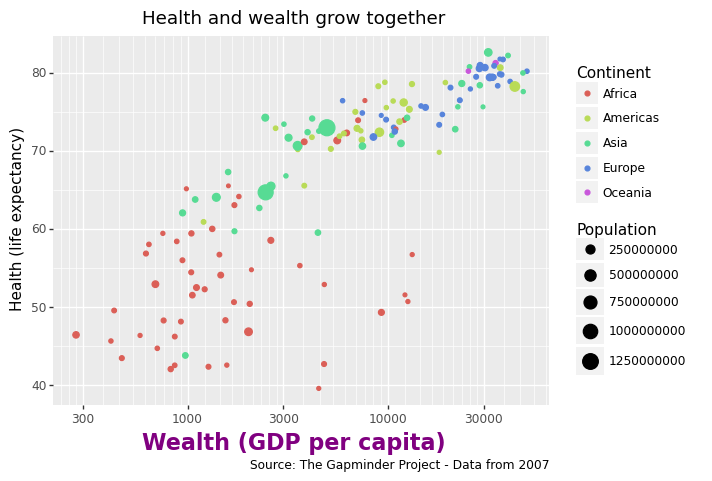

<ggplot: (136796836244)>

In [121]:
# Salvando o gráfico anterior em 'p' (o principal)
p = (ggplot(gapminder_2007,
       aes(x = "gdpPercap", y = "lifeExp",
           color = "continent", size = "pop")) +
  geom_point() +
  scale_x_log10() +
  labs(title = "Health and wealth grow together",
       x = "Wealth (GDP per capita)",
       y = "Health (life expectancy)",
       color = "Continent",
       size = "Population",
       caption = "Source: The Gapminder Project - Data from 2007"))

# Customizando as coisas não relacionados ao mapeamento dos dados
p + theme(axis_title_x = element_text(size=16,
                                      color="purple",
                                      face="bold", # negrito
                                      angle=0))


## Salvando um gráfico

Para salvar, nós salvamos nosso gráfico em uma variável e utilizamos o comando *ggsave*. Essa função aceita vários parâmetros para salvar o gráfico em vários formatos e tamanhos. Vale a pena olhar a sua [documentacao](https://plotnine.readthedocs.io/en/stable/generated/plotnine.ggplot.html)

In [125]:
graph = (ggplot(gapminder_2007,
       aes(x = "gdpPercap", y = "lifeExp",
           color = "continent", size = "pop")) +
  geom_point() +
  scale_x_log10() +
  labs(title = "Health and wealth grow together",
       x = "Wealth (GDP per capita)",
       y = "Health (life expectancy)",
       color = "Continent",
       size = "Population",
       caption = "Source: The Gapminder Project - Data from 2007"))

ggsave(plot = graph, filename = "gapminder_graph.png", path = "../img") # em plot indica qual gráfico salvar
# para os formatos, pesquisar: ggsave plotnine

C:\ProgramData\miniconda3\envs\datascience\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\ProgramData\miniconda3\envs\datascience\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ..\img\gapminder_graph.png


Para gráficos de linha, pesquisar geom_line na documentação do Plotnine.